In [1]:
import pandas as pd
import numpy as np

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### [t 분포]
###### ?) 확률변수 t는 자유도가 100인 t-분포를 따른다. t값이 2.0일 때, P(T<=t)을 계산하시오.

In [2]:
t = 2.0
df = 100

prob = stats.t.cdf(t,df)
print("P(T<t)):{:.3f}".format(prob))

P(T<t)):0.976


### [x^2 분포 실습]
###### ?) 확률변수 x^2는 자유도가 8인 x^2 -분포를 따른다. x^2값이 3.0일 때, P(X < x^2)을 계산하시오.

In [3]:
chisq = 3.0
df = 8

prob = stats.chi2.cdf(chisq,df)
print("P(X<={0})):{1:.4f}".format(chisq,prob))

P(X<=3.0)):0.0656


### [F 분포]
###### ?) 확률변수 F는 각각 자유도가 10, 100인 F-분포를 따른다. F값이 1.5일 때, P(X<=F)을 계산하시오.

In [4]:
f = 1.5
dfnum = 10
dfden = 100

prob = stats.f.cdf(x=f, dfn=dfnum, dfd=dfden)
print("P(X<=F): {:.3f}".format(prob))

P(X<=F): 0.850


### [이항분포]
###### ?) 도장공정에서 광택도 불량이 30%나 된다고 함 / 5대의 차량을 임의로 선택했을 때 불량대수가 각각 0,1,2,3,4,5대가 나올 확률은 얼마인가요?

In [5]:
n = 5
for i in range(n+1):
    prob = stats.binom.pmf(k=i, n=n, p=0.3)
    print("P(X={0})={1:.3f}".format(i,prob))

P(X=0)=0.168
P(X=1)=0.360
P(X=2)=0.309
P(X=3)=0.132
P(X=4)=0.028
P(X=5)=0.002


### [정규성 검정]
###### ?) 변수, Mat_A와 Mat_B에 대해 각각 정규성을 검정합니다.
###### ----------------------------------------------------------------------------------------
##### 귀무가설(H0) : 데이터셋이 정규분포를 따른다.
##### 대립가설(H1) : 데이터셋이 정규분포를 따르지 않는다.

In [6]:
#실습파일 2sample_t_test.csv를 불러온다.
ds_camshaft = pd.read_csv("/home/piai/22기 최예진/230510/1 Big Data 분석 기초/2sample_t_test.csv")
ds_camshaft.head()

,Mat_A,Mat_B,Total,Sub
0,73.4,68.7,73.4,1
1,77.0,71.4,77.0,1
2,73.7,69.8,73.7,1
3,73.3,75.3,73.3,1
4,73.1,71.3,73.1,1


In [7]:
df = ds_camshaft.dropna()
data1 = df['Mat_A']
stats.shapiro(data1)

ShapiroResult(statistic=0.906264066696167, pvalue=0.2563020884990692)

###### : 변수 Mat_A의 정규성 검정결과  p-value가 0.05보다 큼 ->정규 / 따라서 이 Mat_A의 데이터셋이 정규분포를 따른다고 볼 수 있다.

In [8]:
df = ds_camshaft.dropna()
data2 = df['Mat_B']
stats.shapiro(data2)

ShapiroResult(statistic=0.9729753732681274, pvalue=0.9169775247573853)

###### : 변수 Mat_B의 정규성 검정결과  p-value가 0.05보다 큼 ->정규 / 따라서 이 Mat_B의 데이터셋이 정규분포를 따른다고 볼 수 있다.

### [모평균 구간추정]
###### ?) 새로운 품종의 감자 20Box를 랜덤푸풀하여 무게를 측정할 결과가 다음과 같음 / 이 자료로부터 신품종 배추의 평균 무게에 대한 95% 신뢰구간을 구하시오.

In [9]:
df = pd.DataFrame({"sample":[18,18,20,21,20,23,19,18,17,21,22,20,20,21,20,19,19,18,17,19]})
df.head()

,sample
0,18
1,18
2,20
3,21
4,20


In [10]:
lower,upper = stats.norm.interval(0.95, loc=np.mean(df),scale=3.8/np.sqrt(20))
print("신뢰구간 :({0},{1})".format(lower.round(2),upper.round(2)))

신뢰구간 :([17.83],[21.17])


### [모평균 신뢰구간 추정]
###### ?) 이 모평균값의 95% 신뢰구간을 추정하시오.

In [11]:
df=pd.DataFrame({'sample':[73,71,74,69,70,73,70,68,75,72,70,72,73,70,70,72,71,70,75,72]})

lower,upper = stats.t.interval(0.95,len(df)-1, loc=np.mean(df), scale=stats.sem(df))
print("신뢰구간 :({0},{1})".format(lower.round(2),upper.round(2)))

신뢰구간 :([70.6],[72.4])


### [추론통계(1-Sample)]
###### ?)  개선활동이 만족도를 변화시켰는가?
###### ------------------------------------------------------------------
###### 귀무가설(H0) : 평균이 78.0이다.
###### 대립가설(H1) : 평균이 78.0이 아니다.

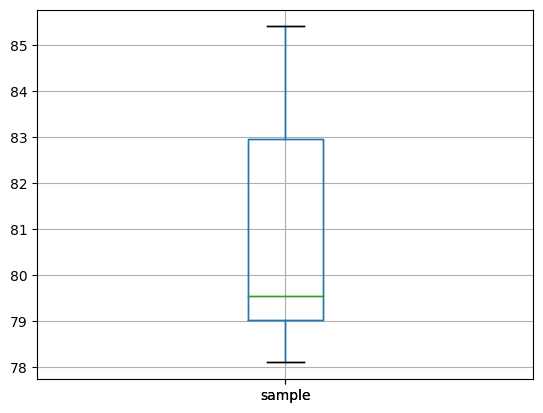

In [43]:
df = pd.DataFrame({'sample':[85.0,79.0,79.1,79.9,81.6,78.6,85.4,83.4,78.1,79.2]})

df.boxplot(['sample'])
plt.show()

###### - 유의수준 : 0.05

In [40]:
statistic, p = stats.shapiro(df['sample'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.8473217487335205, p-value=0.0539751797914505


In [41]:
t_result=stats.ttest_1samp(df, 78.0)

t,p=t_result.statistic.round(3), \
    t_result.pvalue.round(3)

print("1-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

1-Sample t-test
t 통계량 : [3.379]
p-value : [0.008]


###### < 결과 1 : p-value 값이 0.008로 유의수준 0.05보다 작으므로  귀무가설을 기각할 수 있다. 따라서 평균이 78.0이 아니다. >

In [42]:
#개선활동 후 평균
np.mean(df)

sample    80.93
dtype: float64

##### < 결과2 : 개선활동 후 평균을 구해보면 78.0보다 높아진 것으로 보아 만족도를 좋게 변화시킨것으로 볼 수 있다. >

### [추론통계(2-Sample)]
###### ?) 공급자 간에 모평균에 차이가 있다고 할 수 있는가?
###### ----------------------------------------------------------------------------
###### 귀무가설(H0) : 공급자 간에 모평균에 차이가 없다.
###### 대립가설(H1) : 공급자 간에 모평균에 차이가 있다.
###### 유의수준 = 0.05

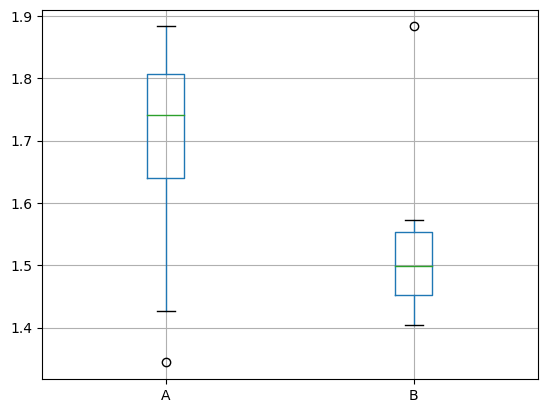

In [15]:
df = pd.DataFrame({'A':[1.883,1.715,1.799,1.768,1.711,1.832,1.427,1.344],
                  'B':[1.435,1.572,1.486,1.511,1.457,1.548,1.404,1.883]})
df.boxplot(['A','B'])
plt.show()

In [16]:
statistic,p=stats.shapiro(df['A'])
print("statistic={},p-value={}".format(statistic,p))

statistic=0.8425754904747009,p-value=0.08004532009363174


In [17]:
statistic,p=stats.shapiro(df['B'])
print("statistic={},p-value={}".format(statistic,p))

statistic=0.7734811902046204,p-value=0.014793740585446358


In [18]:
stats.bartlett(df['A'],df['B'])

BartlettResult(statistic=0.42411436523132123, pvalue=0.5148911629500761)

In [19]:
t_result = stats.ttest_ind(df['A'],df['B'])

t,p=t_result.statistic.round(3),t_result.pvalue.round(3)

print("2-Sample t-test")
print("t: {}".format(t))
print("p: {}".format(p))

2-Sample t-test
t: 1.7
p: 0.111


###### <결과: p-value가 0.111이므로, 유의수준 0.05에서 귀무가설을 채택할 수 있다. 따라서, 공급자 간의 모평균의 차이가 없다.>

### [추론통계(paired)]
###### ?) 회사원들의 성적은 학원가기 전후에 대해 차이가 있는지 검정하라.
###### ----------------------------------------------------------------------------------------
###### 귀무가설(H0) : 회사원들의 성적은 학원가기 전후에 대해 차이가 없다.
###### 대립가설(H1) : 회사원들의 성적은 학원가기 전후에 대해 차이가 있다.

In [20]:
df1=pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648]})
df2=pd.DataFrame({'after':[710,580,787,712,750,600,782,670,790,680]})

t_result=stats.ttest_rel(df1,df2)

t,p = t_result.statistic.round(3),t_result.pvalue.round(3)

In [21]:
print("Paired t-test")
print("t:{}".format(t))
print("p:{}".format(p))

Paired t-test
t:[-2.266]
p:[0.05]


###### <결과 : p-value가 0.05이므로, 유의수준 0.05에서 귀무가설을 기각할 수 있다. 즉, 회사원들의 성적은 학원가기 전후에 대해 차이가 있다고 볼 수 있다. >

### [1 Proportion test]
###### ?) 동전 100번을 던져보노 결과, 앞면이 40번 나왔으며 뒷면이 60번 나왔다. 이 동전은 정상인가를 검정하라. (정상적인 동전을 던질 때 앞면이 나올 확률은 50%)
###### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###### 귀무가설(H0) : 이 동전은 정상적인 동전이다. 즉, 앞면이 나올 확률은 50%이다.
###### 대립가설(H1) : 이 동전은 정상적인 동전이 아니다. 앞면이 나올 확률은 50%가 아니다.

In [22]:
count = 40
n_obs = 100
value = 0.5

stat,pval = proportions_ztest(count,n_obs,value)

In [23]:
print("1 Proportion test")
print('z:{0:0.3f}'.format(stat))
print('p:{0:0.3f}'.format(pval))

1 Proportion test
z:-2.041
p:0.041


###### <결과 : 검정통계량 z값은 -2.041이며, 유의확률(p-value)은 0.041이므로, 유의수준 0.05에서 귀무가설을 기각할 수 있다. 즉, 이 동전은 정상적인 동전이 아니며, 앞면이 나올 확률은 50%가 아니라는 결론을 내릴 수 있다. >

### [2 Proportion test]
###### ?) 두 공정의 불량률이 같다고 할 수 있는가?
###### -----------------------------------------------------------------------
###### 귀무가설(H0) : 두 공장의 불량률은 같다.
###### 대립가설(H1) : 두 공장의 불량률은 같지 않다.
###### 유의수준 = 0.05

In [24]:
count = np.array([14,5])
nobs = np.array([1200,1200])

stat,pval = proportions_ztest(count,nobs)

In [25]:
print("2 Proportion test")
print('z:{0:0.3f}'.format(stat))
print('p:{0:0.3f}'.format(pval))

2 Proportion test
z:2.073
p:0.038


###### <결과 : 검정통계량 z값은 2.073이며, 유의확률(p-value)은 0.038이므로, 유의수준 0.05에서 귀무가설을 기각할 수 있다. 즉, 두 공장의 불량률은 같지 않다. >

### [카이제곱 검정]
###### ?) 각 제품에 대해 이미지에 대해 차이가 있겠는가?
###### -----------------------------------------------------------------------
###### 귀무가설(H0) : 차이가 없다.
###### 대립가설(H1) : 차이가 있다.
###### 유의수준 = 0.05

In [26]:
df = pd.DataFrame({'A':[18,1,8,7,10,9,10],'B':[8,2,14,5,5,9,4],
                   'C':[4,1,3,4,9,5,4],'D':[4,1,2,3,2,7,3],
                  'E':[3,1,3,1,1,1,1],'F':[3,25,8,10,2,1,7]})

chi,pval,dof,expected = stats.chi2_contingency(df)

In [36]:
print("chi-square test")
print('chisq:{0:0.2f}'.format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom:{}'.format(dof))
print('expected value:\n{}'.format(expected.round(1)))

chi-square test
chisq:98.27
p:0.000
degree pf freedom:30
expected value:
[[11.   8.2  5.2  3.8  1.9  9.8]
 [ 8.5  6.4  4.1  3.   1.5  7.6]
 [10.5  7.8  5.   3.7  1.8  9.3]
 [ 8.3  6.2  3.9  2.9  1.4  7.3]
 [ 8.   6.   3.8  2.8  1.4  7.1]
 [ 8.8  6.6  4.2  3.1  1.5  7.8]
 [ 8.   6.   3.8  2.8  1.4  7.1]]


###### < 결과 : p-value : 0.000 이므로 유의수준보다 작으므로 유의수준 0.05에서 귀무가설을 기각할 수 있다. 즉 각 제품에 대해 이미지에 대해 차이가 있다고 볼 수 있다.  >

### [ANOVA]
##### ?) 강종별로 2차 정련시간이 차이가 있는지 검정하라
###### -----------------------------------------------------------------------
###### 귀무가설(H0) :강종별로 2차 정련시간이 차이가 없다.
###### 대립가설(H1) : 강종별로 2차 정련시간이 차이가 있다.
###### 유의수준 = 0.05

In [28]:
df = pd.read_csv("/home/piai/22기 최예진/230510/1 Big Data 분석 기초/ANOVA.csv")
df.head()

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a


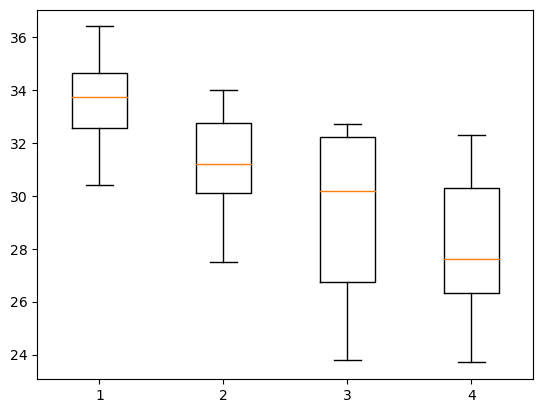

In [29]:
#gangjong별로 2차정련 시간 차이
df1=df[df['gangjong']=='a']['time']
df2=df[df['gangjong']=='b']['time']
df3=df[df['gangjong']=='c']['time']
df4=df[df['gangjong']=='d']['time']

plt.boxplot([df1,df2,df3,df4])
plt.show()

In [30]:
f_result=stats.f_oneway(df1,df2,df3,df4)

f,p=f_result.statistic.round(3),f_result.pvalue.round(3)

print("One-way")
print("F통계량 :{}".format(f))
print("p-value :{}".format(p))

One-way
F통계량 :4.172
p-value :0.019


###### < 결과 : p-value가 0.019로  p-value가 유의수준보다 작기 때문에 귀무가설을 기각하고 대립가설을 채택한다. 따라서, 강종별로 2차정련 시간이 차이가 있다. >

###### ?) type별로 2차정련 시간에 차이가 있는지 검정하라
###### ----------------------------------------------------------------------------
###### 귀무가설(H0) :type별로 2차 정련시간이 차이가 없다.
###### 대립가설(H1) :type별로 2차 정련시간이 차이가 있다.

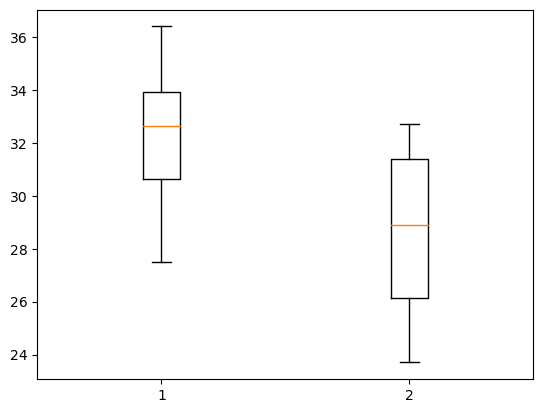

In [31]:
#type별로 2차정련 시간 차이
df1=df[df['type']=='a']['time']
df2=df[df['type']=='b']['time']

plt.boxplot([df1,df2])
plt.show() 

In [32]:
f_result=stats.f_oneway(df1,df2)

f,p=f_result.statistic.round(3),f_result.pvalue.round(3)

print("One-way")
print("F통계량 :{}".format(f))
print("p-value :{}".format(p))

One-way
F통계량 :9.654
p-value :0.005


###### < 결과 : p-value가 0.005로 유의수준보다 작기 때문에 귀무가설을 기각하고 대립가설을 채택합니다. 따라서, type 별로 2차 정련시간이 차이가 있다. >

### [상관분석]
###### ?) 초코칩의 강도와 재료 반죽온도간에 관계를 분석하기 위한 상관분석을 하세요
###### ------------------------------------------------------------------------------------------------------------
###### 귀무가설(H0) : 초코칩의 강도와 재료 반죽온도간의 상관관계가 없다.
###### 대립가설(H1) : 초코칩의 강도와 재료 반죽온도간의 상관관계가 있다.

In [33]:
df1 = [37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5]
df2 = [14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21]

corr,pval=stats.pearsonr(df1,df2)

In [34]:
print("Correlation Analysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Analysis
corr:-0.723
p-value:0.000


###### < 결과 : 음의 상관관계가 있으면 한 변수가 증가할 때 한 변수는 감소한다. 따라서 반죽온도가 높으면 초코칩의 강도는 약해지고, 반죽온도가 낮아지면 초코칩의 강도는 강해지는 관계가 있는 것을 알 수 있다. >